# **Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import random
import plots
from matplotlib import pyplot as plt
from Vince_helpers import *

Load csv file into a pandas dataframe with the right surprise format (userID, itemID, rating)

In [2]:
train = pd.read_csv('data_train.csv')
train = to_surprise(train)

In [3]:
#Basic summary statistics
num_entries = train.shape[0]
num_users = train.userID.unique().shape[0]
num_movies = train.itemID.unique().shape[0]
sparsity = (1 - (num_entries/(num_users*num_movies)))*100
print('Number of users: ', num_users)
print('Number of movies: ', num_movies)
print('Number of entries: ', num_entries)
print('Ratings range: ', sorted(train.rating.unique()))
print('Ratings matrix sparsity: ', sparsity, '%')

Number of users:  10000
Number of movies:  1000
Number of entries:  1176952
Ratings range:  [1, 2, 3, 4, 5]
Ratings matrix sparsity:  88.23048 %


Most ratings given:  522
Least ratings given:  3
Average ratings given:  117.6952
Median ratings given:  104.0
Number of users with less than 15 ratings:  40


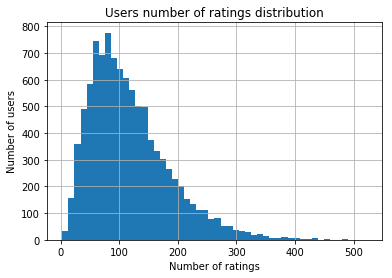

In [4]:
#Number of ratings per user
num_ratings_user = train.groupby('userID').size()
print('Most ratings given: ', num_ratings_user.max())
print('Least ratings given: ', num_ratings_user.min())
print('Average ratings given: ', num_ratings_user.mean())
print('Median ratings given: ', num_ratings_user.median())
print('Number of users with less than 15 ratings: ', (num_ratings_user < 15).sum())
num_ratings_user.hist(bins=50)
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.title('Users number of ratings distribution')
plt.show()

Most ratings received:  4590
Least ratings received:  8
Average ratings received:  1176.952
Median ratings received:  883.5
Number of movies with less than 100 ratings:  32


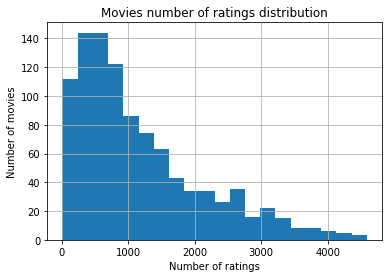

In [10]:
#Number of ratings per movie
num_ratings_movie = train.groupby('itemID').size()
print('Most ratings received: ', num_ratings_movie.max())
print('Least ratings received: ', num_ratings_movie.min())
print('Average ratings received: ', num_ratings_movie.mean())
print('Median ratings received: ', num_ratings_movie.median())
print('Number of movies with less than 100 ratings: ', (num_ratings_movie < 100).sum())
num_ratings_movie.hist(bins=20)
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.title('Movies number of ratings distribution')
plt.show()

Both histograms reveal right skewed distributions as suggested by a median to mean ratio smaller than 1 (to a greater extent for movies than for users). That is some users give and some movies receive an inordinate amount of ratings compared to their peers. Besides we have mostly more than 15 and 100 data points for every user and movie. Therefore we should be able to give sensible recommendations (better than hard baselines) for every movie/user present in the dataset.

Highest user average rating:  4.932950191570881
Smallest user average rating:  1.8461538461538463
Average user average rating:  3.8321255854690937
Median user average rating:  3.8524040048410164


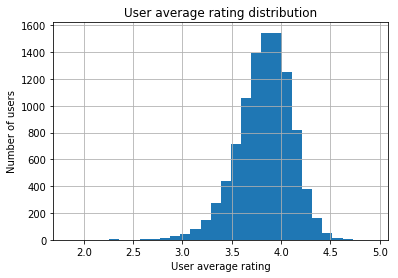

In [11]:
#Average rating per user
user_avg_rating = train.groupby('userID').mean().rating
print('Highest user average rating: ', user_avg_rating.max())
print('Smallest user average rating: ', user_avg_rating.min())
print('Average user average rating: ', user_avg_rating.mean())
print('Median user average rating: ', user_avg_rating.median())
user_avg_rating.hist(bins=30)
plt.xlabel('User average rating')
plt.ylabel('Number of users')
plt.title('User average rating distribution')
plt.show()

Highest movie average rating:  4.726254262055528
Smallest movie average rating:  2.022222222222222
Average movie average rating:  3.603684376319098
Median movie average rating:  3.621115593267492


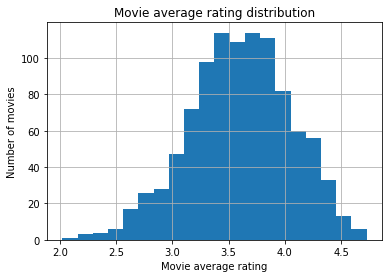

In [13]:
#Average rating per movie
movie_avg_rating = train.groupby('itemID').mean().rating
print('Highest movie average rating: ', movie_avg_rating.max())
print('Smallest movie average rating: ', movie_avg_rating.min())
print('Average movie average rating: ', movie_avg_rating.mean())
print('Median movie average rating: ', movie_avg_rating.median())
movie_avg_rating.hist(bins=20)
plt.xlabel('Movie average rating')
plt.ylabel('Number of movies')
plt.title('Movie average rating distribution')
plt.show()

The last two histograms reveal user and movie bias. That is some users tend to give and some movies tend to receive higher ratings than others. Baseline models will capture such biases. We also note the absence of "troll" users, that is users that would give 1's or 5's to every movie they rated. Here we won't have to deal with this kind of corrupted data.